## **En primer lugar importamos las librerías que vamos a necesitar.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize
#from google.colab import files
#from google.colab import drive
#drive.mount('/content/drive')

## **En el segundo paso importamos desde Excel la data de los activos que seleccionemos.**

In [2]:
# Next we will get the stock tickers and the price data.

file_path = r'C:\Users\Juan Carlos\Dropbox\Clases\EAFIT\Inversiones\Archivos Excel\Construcción Optimización Portafolios.xlsx'

# file_path = "/Users/juanbotero/Dropbox/Clases/EAFIT/Inversiones/Archivos Excel/Construcción Optimización Portafolios.xlsx"

# file_path = '/content/drive/My Drive/Colab/Excel Files for Colab/Construcción Optimización Portafolios.xlsx'

returns_data = pd.read_excel(file_path, sheet_name='IMI Historical Data (1)')

returns_data.set_index('Date', inplace=True)

column_names = returns_data.columns.tolist()

# Print the column names
print(column_names)

ticker = column_names

print(returns_data.head())
print(returns_data.tail())


['Cemento Argos', 'Bancolombia', 'Ecopetrol', 'Grupo Energía de Bogotá (GEB)', 'ISA']
            Cemento Argos  Bancolombia  Ecopetrol  \
Date                                                
2010-04-04         0.0184       0.0368     0.0093   
2010-04-11         0.0000       0.0095    -0.0128   
2010-04-18         0.0082      -0.0009     0.0335   
2010-04-25        -0.0634      -0.0120    -0.0054   
2010-05-02        -0.0486       0.0113    -0.0344   

            Grupo Energía de Bogotá (GEB)     ISA  
Date                                               
2010-04-04                         0.0040  0.0094  
2010-04-11                        -0.0054  0.0015  
2010-04-18                         0.0375  0.0139  
2010-04-25                        -0.0039 -0.0107  
2010-05-02                        -0.0395 -0.0370  
            Cemento Argos  Bancolombia  Ecopetrol  \
Date                                                
2023-12-03         0.0312       0.0185    -0.0314   
2023-12-10         

## **En el tercer paso calculamos el retorno promedio de los activos, así como su desviación estándar.**

In [3]:
Assets_Returns = (np.mean(returns_data)*52)
print('Annual Asset Returns')
print(Assets_Returns)

print()

Assets_Std = (np.std(returns_data)*np.sqrt(52))
print('Annual Standard Deviations')
print(Assets_Std)

print()

Annual Asset Returns
Cemento Argos                    0.062349
Bancolombia                      0.086836
Ecopetrol                        0.052876
Grupo Energía de Bogotá (GEB)    0.067933
ISA                              0.056063
dtype: float64

Annual Standard Deviations
Cemento Argos                    0.353706
Bancolombia                      0.315354
Ecopetrol                        0.342423
Grupo Energía de Bogotá (GEB)    0.223416
ISA                              0.266878
dtype: float64



/Users/juanbotero/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## **En este cuarto paso calculamos el Ratio de Sharpe de cada uno de los activos con los que estamos trabajando, así como el del S&P500.**

In [5]:
risk_free_rate = 0.04

Sharpe_Ratios_Assets = (Assets_Returns - risk_free_rate) / Assets_Std

print('Sharpe Ratios')
print(Sharpe_Ratios_Assets)

Sharpe Ratios
Cemento Argos                    0.063186
Bancolombia                      0.148518
Ecopetrol                        0.037604
Grupo Energía de Bogotá (GEB)    0.125028
ISA                              0.060188
dtype: float64


## **En el quinto paso convertimos los precios de los activos a Base 100, con el fin de poderlos apreciar mejor en una gráfica.**

In [6]:
# create price series
# Create a DataFrame with prices starting at 100 for each asset
Prices_Base100 = (1 + returns_data).cumprod() * 100
print(Prices_Base100.head())

            Cemento Argos  Bancolombia   Ecopetrol  \
Date                                                 
2010-04-04     101.840000   103.680000  100.930000   
2010-04-11     101.840000   104.664960   99.638096   
2010-04-18     102.675088   104.570762  102.975972   
2010-04-25      96.165487   103.315912  102.419902   
2010-05-02      91.491845   104.483382   98.896657   

            Grupo Energía de Bogotá (GEB)         ISA  
Date                                                   
2010-04-04                     100.400000  100.940000  
2010-04-11                      99.857840  101.091410  
2010-04-18                     103.602509  102.496581  
2010-04-25                     103.198459  101.399867  
2010-05-02                      99.122120   97.648072  


## **En esta parte vamos a graficar los precios de los activos en base 100.**

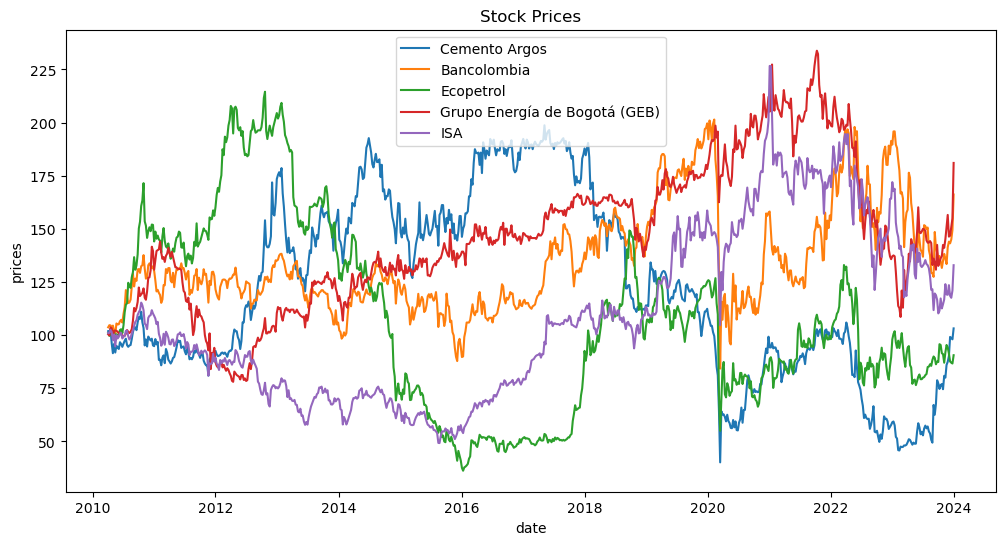

In [7]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points
plt.plot(Prices_Base100, label=(ticker))

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')

# giving a title to my graph
plt.title('Stock Prices')

# Adding legends based on column names in the DataFrame
plt.legend()


# function to show the plot
plt.show()

## **Ahora Calcularemos tanto la Matriz de Correlaciones como la Matriz de Varianza-Covarianza**

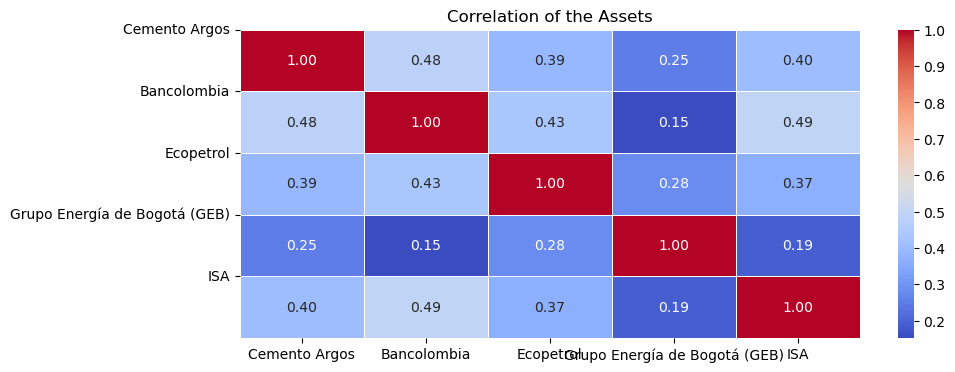


Matrix Variance-Covariance (Annual)
                               Cemento Argos  Bancolombia  Ecopetrol  \
Cemento Argos                       0.125282     0.053480   0.047045   
Bancolombia                         0.053480     0.099587   0.047017   
Ecopetrol                           0.047045     0.047017   0.117417   
Grupo Energía de Bogotá (GEB)       0.019717     0.010772   0.021575   
ISA                                 0.037968     0.041409   0.033504   

                               Grupo Energía de Bogotá (GEB)       ISA  
Cemento Argos                                       0.019717  0.037968  
Bancolombia                                         0.010772  0.041409  
Ecopetrol                                           0.021575  0.033504  
Grupo Energía de Bogotá (GEB)                       0.049984  0.011182  
ISA                                                 0.011182  0.071323  


In [8]:
Mat_Correlaciones = returns_data.corr()

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(Mat_Correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.xticks(
    ticks=np.arange(0.5, len(ticker), 1),
    labels=ticker,
    rotation=0,
    ha='center')

plt.yticks(range(len(ticker)), ticker, rotation=0)

plt.title('Correlation of the Assets')
plt.show()

print()
print('Matrix Variance-Covariance (Annual)')
Mat_Var_Covar = returns_data.cov()*52
print(Mat_Var_Covar)


## **Ahora vamos a calcular el retorno y varianza de un portafolio de pesos iguales (Equally Weighted)**

In [10]:
num_assets = len(ticker)
W_equal = np.ones(num_assets) / num_assets
print(W_equal)

print()

print('Return of an Equally Weighted Portfolio')
Return_Equally_Weighted = np.dot(W_equal, Assets_Returns)
print(f"{Return_Equally_Weighted:.2%}")

print()

print('Variance of an Equally Weighted Portfolio')
Variance_Equally_Weighted = np.dot(np.dot(W_equal, Mat_Var_Covar), W_equal.T)
print(f"{Variance_Equally_Weighted:.2%}")

print()

print('Sharpe Ratio of an Equally Weighted Portfolio')
SR_Equally_Weighted = (Return_Equally_Weighted - risk_free_rate) / np.sqrt(Variance_Equally_Weighted)
print(f"{SR_Equally_Weighted:.2}")

[0.2 0.2 0.2 0.2 0.2]

Return of an Equally Weighted Portfolio
6.52%

Variance of an Equally Weighted Portfolio
4.44%

Sharpe Ratio of an Equally Weighted Portfolio
0.12


## **A continuación definimos la función que halla los w que minimizan la varianza dado un retorno esperado**

In [11]:
Mat_var_covar_array = np.array(Mat_Var_Covar)
Assets_returns_array = np.array(Assets_Returns)

# Check if it's a NumPy array
if isinstance(Assets_returns_array, np.ndarray):
    print("It's a NumPy array!")
else:
    print("It's not a NumPy array.")

It's a NumPy array!


In [12]:
def minimize_variance(covariance_matrix, expected_returns, target_return):
    num_assets = len(expected_returns)

    # Initial guess for weights (random, non-negative, and sum to 1)
    initial_weights = np.random.rand(num_assets)
    initial_weights /= np.sum(initial_weights)

    # Objective function: variance of the portfolio
    objective_function = lambda w: np.dot(w.T, np.dot(covariance_matrix, w))

    # Constraints
    constraint_return = lambda w: np.dot(w, expected_returns) - target_return
    constraint_sum_weights = lambda w: np.sum(w) - 1
    Non_negativity_constraint = lambda w: w

    # Combine constraints into a tuple
    constraints = (
        {'type': 'eq', 'fun': constraint_return},
        {'type': 'eq', 'fun': constraint_sum_weights},
        {'type': 'ineq', 'fun': Non_negativity_constraint}
    )

    # Optimization
    result = minimize(
        objective_function,
        x0=initial_weights,
        method='SLSQP',
        constraints=constraints
    )

    return result.x

## **El siguiente paso es definir la función que calcula la frontera eficiente, dados una serie de retornos**

In [13]:
def efficient_frontier(covariance_matrix, expected_returns, num_points):
    min_return = min(expected_returns)
    max_return = max(expected_returns)
    target_returns = np.linspace(min_return, max_return, num_points)

    portfolio_returns = []
    portfolio_std_devs = []
    portfolio_weights = []

    for i, target_return in enumerate (target_returns):
        weights = minimize_variance(covariance_matrix, expected_returns, target_return)
        portfolio_returns.append(np.dot(weights, expected_returns))
        portfolio_std_devs.append(np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights))))
        portfolio_weights.append(weights)

    return np.array(portfolio_returns), np.array(portfolio_std_devs), np.array(portfolio_weights)

## **Seguidamente imprimimos cada uno de los puntos de la frontera eficiente que hallamos y graficamos dicha frontera**

In [14]:
num_points = 100

Expe                 Standard Deviation   Weights
0.052876             0.342662             [ 1.86709223e-11 -4.74052019e-12  1.00000000e+00 -2.07034122e-12
  4.79747431e-12]
0.053219             0.317430             [-1.38777878e-17  1.11022302e-16  8.92355310e-01 -2.49800181e-16
  1.07644690e-01]
0.053562             0.294836             [ 3.19189120e-16 -5.55111512e-17  7.84710794e-01  0.00000000e+00
  2.15289206e-01]
0.053905             0.275527             [ 9.71445147e-17  1.66533454e-16  6.77066032e-01 -1.38777878e-16
  3.22933968e-01]
0.054248             0.260238             [-3.29597460e-17  1.90819582e-17  5.69421483e-01 -1.99493200e-17
  4.30578517e-01]
0.054591             0.249706             [ 9.66745445e-17 -2.28763412e-17  4.61776860e-01  1.65340831e-18
  5.38223140e-01]
0.054934             0.244027             [-5.10251758e-18  3.92786338e-18  3.94660924e-01  1.08801880e-02
  5.94458888e-01]
0.055277             0.239349             [4.53666048e-18 9.78566962e-18 3.

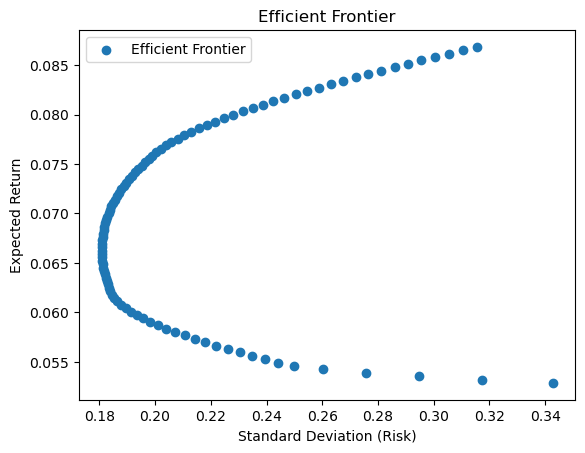

In [15]:
returns, std_devs, weights = efficient_frontier(Mat_var_covar_array, Assets_returns_array, num_points)

min_return = min(Assets_returns_array)
max_return = max(Assets_returns_array)
target_returns = np.linspace(min_return, max_return, num_points)

print(f"{'Expected Return': <20.4} {'Standard Deviation': <20} {'Weights'}")
print("="*65)

for i, target_return in enumerate(target_returns):
    print(f"{target_return:<20.6f} {std_devs[i]:<20.6f} {weights[i]}")

# Plotting the efficient frontier
plt.scatter(std_devs, returns, label='Efficient Frontier')
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

## **Seguidamente definimos la función que calcula el máximo Ratio de Sharpe, con el fin de determinar el portafolio óptimo**

In [16]:
def Max_Sharpe_Ratio(expected_returns, covariance_matrix, risk_free_rate):
    
    # Initial guess for weights (random, non-negative, and sum to 1)
    initial_weights = np.random.rand(num_assets)
    initial_weights /= np.sum(initial_weights)
    
    # Objective function: Sharpe Ratio
    objective_function = lambda w: -(np.dot(w.T, expected_returns) - risk_free_rate) / np.sqrt(np.dot(w.T, np.dot(covariance_matrix, w)))
    
    # Constraints
    constraint_sum_weights = lambda w: np.sum(w) - 1
    Non_negativity_constraint = lambda w: w

    # Combine constraints into a tuple
    constraints = (
        {'type': 'eq', 'fun': constraint_sum_weights},
        {'type': 'ineq', 'fun': Non_negativity_constraint}
    )

    # Optimization
    result = minimize(
        objective_function,
        x0=initial_weights,
        method='SLSQP',
        constraints=constraints
    )

    return result.x

## **El siguiente paso es calcular el retorno y desviación estándar del portafolio óptimo e imprimir toda esta información**

In [18]:
optimal_weights = Max_Sharpe_Ratio(Assets_returns_array, Mat_var_covar_array, risk_free_rate)
optimal_return = np.dot(optimal_weights, Assets_returns_array)
optimal_standard_deviation = np.sqrt(np.dot(optimal_weights, np.dot(Mat_var_covar_array, optimal_weights)))
max_sharpe_ratio = (optimal_return - risk_free_rate) / optimal_standard_deviation

In [19]:
# Convert the weights to percentage format with two decimal places
optimal_weights_percentage = [f'{abs(weight) * 100:.2f}%' for weight in optimal_weights]

# Combine the labels and formatted weights for printing
formatted_output = list(zip(ticker, optimal_weights_percentage))

# Print the result
print("Optimal Weights:")
for label, weight in formatted_output:
    print(f"{label}: {weight}")
    
print()
print(f'Máximo Ratio de Sharpe = {max_sharpe_ratio}')
print()
print(f'Retorno del Portafolio Óptimo = {optimal_return * 100:.2f}%')
print()
print(f'Desviación Estándar del Portafolio Óptimo = {optimal_standard_deviation * 100: .2f}%')

Optimal Weights:
Cemento Argos: 0.00%
Bancolombia: 47.32%
Ecopetrol: 0.00%
Grupo Energía de Bogotá (GEB): 52.68%
ISA: 0.00%

Máximo Ratio de Sharpe = 0.1809363396118488

Retorno del Portafolio Óptimo = 7.69%

Desviación Estándar del Portafolio Óptimo =  20.38%


## **Finalmente graficamos juntos la frontera eficiente y el portafolio óptimo**

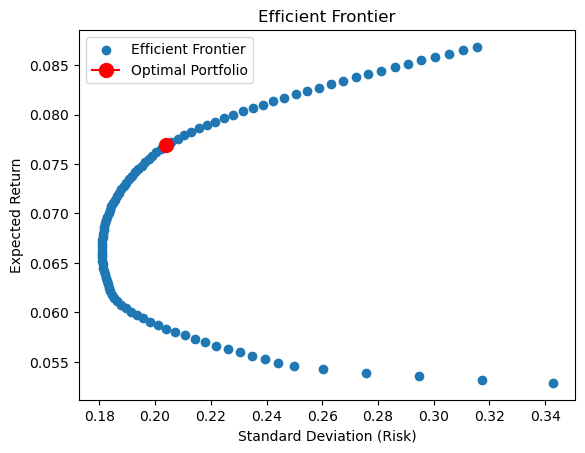

In [20]:
# Plotting the efficient frontier and optimal portfolio
plt.scatter(std_devs, returns, label='Efficient Frontier')
plt.plot(optimal_standard_deviation, optimal_return, color='r',marker='o', markersize=10, label='Optimal Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()